In [39]:
#Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?
#1. Построить точечный график
#2. Рассчитать коэффициенты корреляции Пирсона и Спирмена
#3. Построить модель линейной регрессии
#4. Рассчитать коэффициент детерминации
#5. Вывести график остатков
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
df = pd.read_csv('water.csv')

In [3]:
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


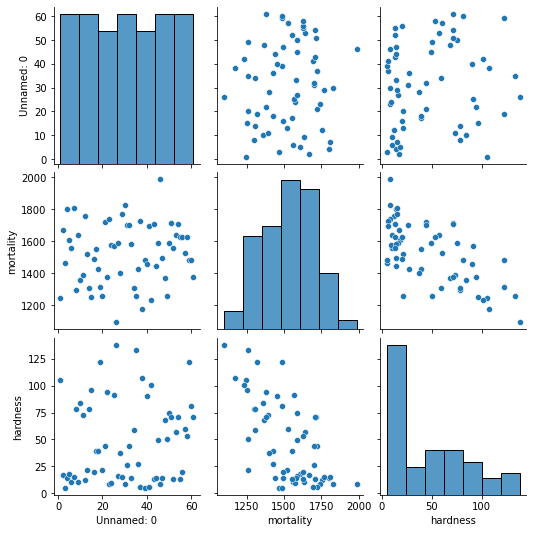

In [4]:
sns.pairplot(df)

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

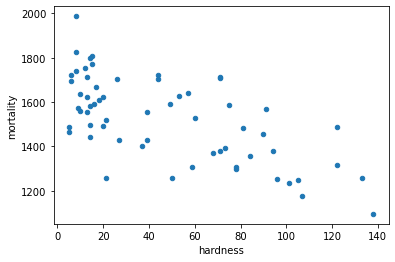

In [5]:
# 1. Точечный график
df.plot(kind='scatter', x='hardness', y='mortality')

In [16]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [17]:
#2.1 Метод Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [18]:
#2.2 Метод Пирсона
df[['hardness', 'mortality']].corr(method='pearson')

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [32]:
#3. Построить модель линейной регрессии
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.shape
y_train.shape
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
model.coef_

array([-2.84496331])

In [34]:
model.intercept_

1643.1771053448515

In [35]:
y_pred = model.predict(X_test)
y_pred

array([1620.41739888, 1603.34761903, 1532.22353632, 1586.27783918,
       1338.76603135, 1492.39405   , 1620.41739888, 1603.34761903,
       1296.09158173, 1517.99871978, 1614.72747226, 1537.91346294,
       1606.19258234, 1429.80485722, 1600.50265572, 1441.18471045,
       1421.2699673 , 1606.19258234, 1500.92893993])

In [36]:
#4. Рассчитать коэффициент детерминации
model.score(X_test, y_test)

0.34431125600956847

In [38]:
#сравним факт и прогноз
new_df = X_test.copy()

new_df['y_pred'] = y_pred
new_df['y_test'] = y_test
new_df

,hardness,y_pred,y_test
29,8,1620.417399,1828
32,14,1603.347619,1581
17,39,1532.223536,1428
15,20,1586.277839,1491
37,107,1338.766031,1175
57,53,1492.394050,1627
45,8,1620.417399,1987
3,14,1603.347619,1800
18,122,1296.091582,1318
20,44,1517.998720,1723


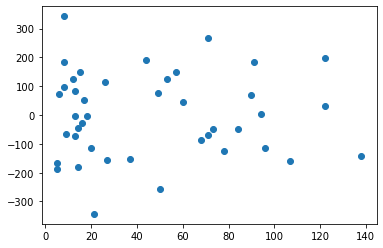

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()
# график остатков
plt.scatter(X_const.iloc[:, 1], results.resid)

In [ ]:
#Зависимость между жесткостью воды и средней годовой смертностью: чем выше жесткость, тем ниже смертность, 
#коэффициенты корреляции < 0,7 и < 0, коэффициент детерминации 0.34431125600956847, что значает низкое практическое значение.

# Задание 2

In [44]:
north_df = df.loc[df['location']=='North']
north_df

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


In [48]:
south_df = df.loc[df['location']=='South']
south_df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

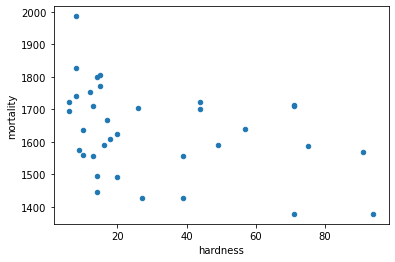

In [45]:
# 1. Точечный график для северных городов
north_df.plot(kind='scatter', x='hardness', y='mortality')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

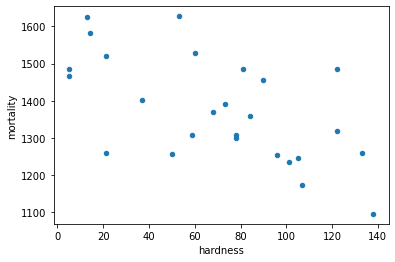

In [49]:
# 1. Точечный график для южных городов
south_df.plot(kind='scatter', x='hardness', y='mortality')

In [46]:
north_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [50]:
south_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [47]:
#2.1 Метод Спирмена для северных
north_df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [51]:
#2.1 Метод Спирмена для южных
south_df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [52]:
#2.2 Метод Пирсона для северных
north_df[['hardness', 'mortality']].corr(method='pearson')

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [53]:
#2.2 Метод Пирсона для южных
south_df[['hardness', 'mortality']].corr(method='pearson')

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [56]:
#3.  модель линейной регрессии для северных
X_north = north_df[['hardness']]
y_north = north_df['mortality']
X_train_north, X_test_north, y_train_north, y_test_north = train_test_split(X_north, y_north, test_size=0.30)
X_train_north.shape
y_train_north.shape
model_north = LinearRegression()
model_north.fit(X_train_north, y_train_north)

LinearRegression()

In [57]:
#3.  модель линейной регрессии для северных
X_south = south_df[['hardness']]
y_south = south_df['mortality']
X_train_south, X_test_south, y_train_south, y_test_south = train_test_split(X_south, y_south, test_size=0.30)
X_train_south.shape
y_train_south.shape
model_south = LinearRegression()
model_south.fit(X_train_south, y_train_south)

LinearRegression()

In [58]:
model_north.coef_

array([-1.13157733])

In [59]:
model_south.coef_

array([-1.8802956])

In [60]:
model_north.intercept_

1693.1874551603976

In [61]:
model_south.intercept_

1505.693954078572

In [62]:
y_pred_north = model_north.predict(X_test_north)
y_pred_north

array([1677.34537255, 1673.95064057, 1586.81918623, 1672.81906324,
       1663.7664446 , 1677.34537255, 1612.84546479, 1612.84546479,
       1662.63486727, 1684.13483653, 1649.05593933])

In [63]:
y_pred_south = model_south.predict(X_test_south)
y_pred_south

array([1359.03089763, 1359.03089763, 1436.12301704, 1496.2924761 ,
       1336.46735048, 1466.20774657, 1481.25011134, 1315.78409893])

In [64]:
#4. Рассчитать коэффициент детерминации
model_north.score(X_test_north, y_test_north)

-0.11278389945132927

In [65]:
#4. Рассчитать коэффициент детерминации
model_south.score(X_test_south, y_test_south)

0.5494372282319098

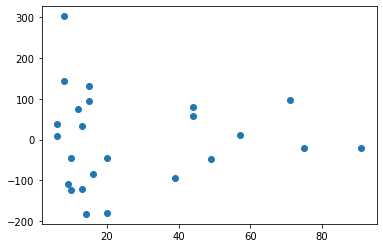

In [68]:
X_const_north = sm.add_constant(X_train_north)
#обучение
model_north = sm.OLS(y_train_north, X_const_north)
results_north = model_north.fit()
# график остатков
plt.scatter(X_const_north.iloc[:, 1], results_north.resid)

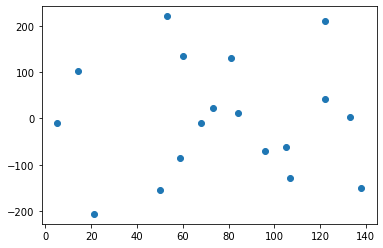

In [69]:
X_const_south = sm.add_constant(X_train_south)
#обучение
model_south = sm.OLS(y_train_south, X_const_south)
results_south = model_south.fit()
# график остатков
plt.scatter(X_const_south.iloc[:, 1], results_south.resid)

In [ ]:
#В южных городах наблюдается низкая практическая значимость, т.к. коэффициент детерминации >0 и <0.7 